        Machine Learning
                                End-to-End Machine Learning Project

main steps:

        1. Look at the big picture
        2. Get the data
        3. Discover and visualize the data to gain insights
        4. Prepare the data for Machine Learning Algorithms
        5. Select a model and Train it
        6. Fine-tune your model
        7. Present your solution
        8. Launch, monitor and maintain your system

--

                    California housing prices

step 1:
        -Look at the Big Picture

                - The first task you are asked to perform is to build a model of housing prices in California using the California census data.

-Frame the problem

                - The first question to ask is what exactly is the business objective; building a model is probably not the end goal. How does the company or yoh expect to use and benefit from this model? This is important because it will determine how you frame the problem, what algorithms you will select, what performance measure you will use to evaluate your model, and how much effort you should spend tweaking it.

        - frame the problem: is it supervised, unsupervised, or Reinforcement Learning? Is it a classification task, a regression task, or something else? Shouldyou use batch learning or online learning techniques? Before you read on, pause and  try to answer these questions for yourself.

- Have you found the answers?

                - it is clearly a typical supervised learning task since you are given labeled training examples. Moreover, it is also a typical regression task, since you are asked to predict a value.

                - More specifically, this is a multiple regression problem since the system will use multiple features to make a prediction.

                - It is also a univariate regression problem since we are only trying to predict a single value for each district. If we were trying to predict multiple values per district, it would be a multivariate regression problem.

--

step 2: 

        Get the Data

In [1]:
# we have our data downloaded in csv, so we load it using pandas

import pandas as pd

df = pd.read_csv('housing.csv')

In [2]:
# check the 1st 5 rows
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# check the last 5 rows
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [4]:
# check the data types
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [5]:
# get more information on the data in terms of quick description of the data, in particular the total number of rows, and each attribute's type and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# check the count of each column
df.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [7]:
# get the keys or columns
df.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
# get the shape of the data in terms of rows and columns
df.shape

(20640, 10)

In [9]:
# show the summary of numerical attributes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


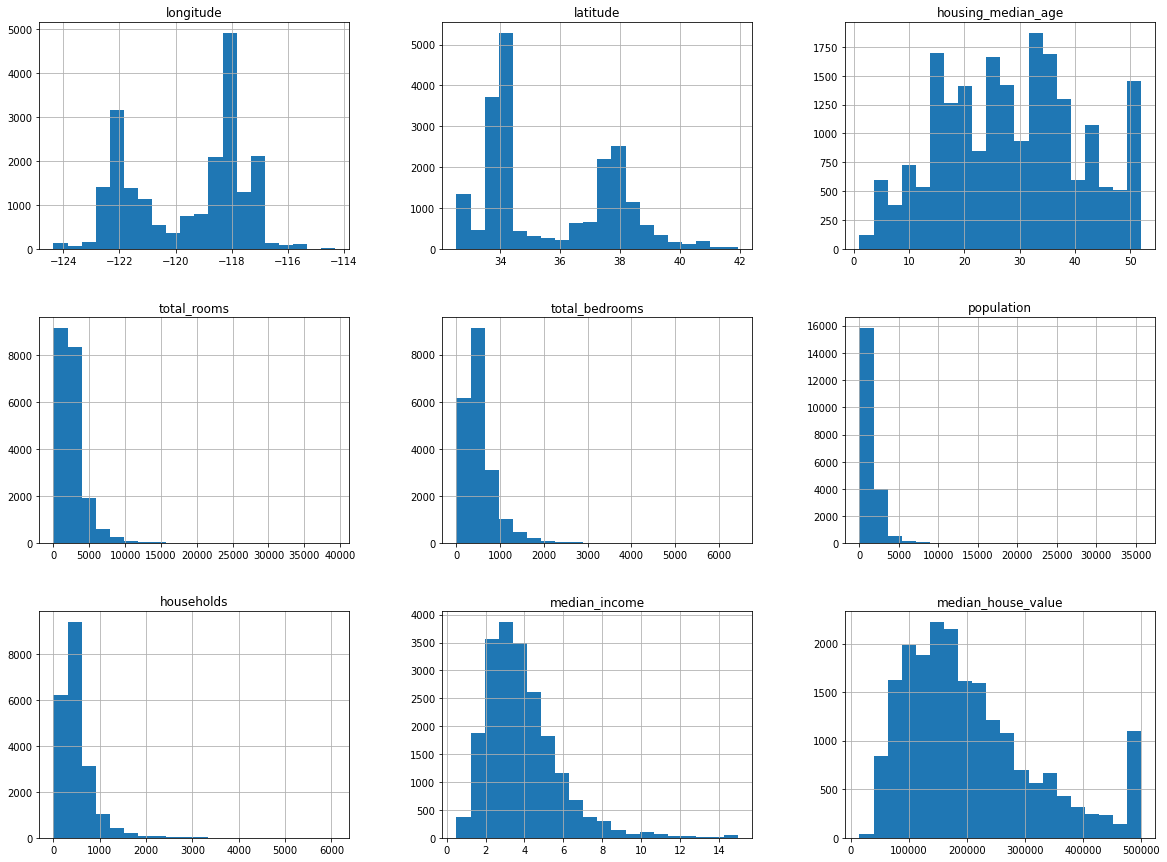

In [10]:
# plot the histogram of each numerical feature

import matplotlib.pyplot as plt

df.hist(bins=20, figsize=(20,15))
plt.show()

In [11]:
# we have a categorical column

df.ocean_proximity.nunique()

5

In [12]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [13]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:>

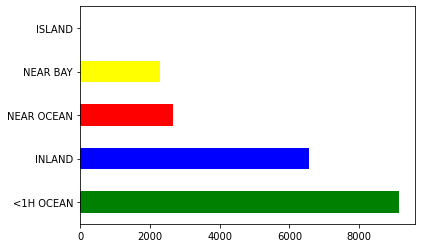

In [14]:
# plot a bar graph

df.ocean_proximity.value_counts().plot(
    kind='barh', color=('green','blue','red','yellow','pink')
)

<AxesSubplot:ylabel='ocean_proximity'>

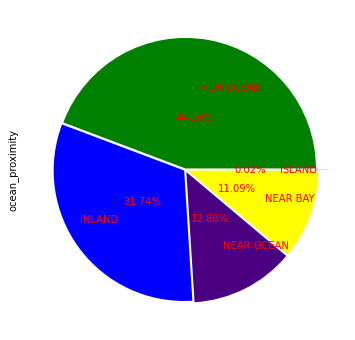

In [15]:
# plot a pie chart to get the percentages
plt.rcParams['figure.figsize'] = (12,6)
df.ocean_proximity.value_counts().plot(
    kind='pie', colors=('green','blue','indigo','yellow','red'), autopct='%.2f%%',
    explode=[0.01,0.01,0.02,0.02,0.1], pctdistance=0.4, labeldistance=0.63, 
    textprops={
        'color':'red'
    }
)

        We can perform EDA on this dataset

In [16]:
# to prepare this dataset for machine learning, convert the categorical column to numerical

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])

In [17]:
# to prepare this dataset for machine learning, deal with missing values

# check missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [18]:
# print names or check all columns which have null values

[val for val in df.columns if df[val].isnull().sum() > 0]

['total_bedrooms']

In [19]:
mask = df.isnull()
total = mask.sum()
percent = 100*mask.mean()

missing_data = pd.concat([total, percent], 
                        axis=1,
                        join='outer',
                        keys=['count_missing', 'percentage_missing (%)'])

missing_data.sort_values(by='percentage_missing (%)', ascending=False,inplace=True)

missing_data

,count_missing,percentage_missing (%)
total_bedrooms,207,1.002907
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
median_house_value,0,0.000000
ocean_proximity,0,0.000000


In [20]:
#print the nullable columns

nullable_columns = df.columns[mask.any()].tolist()

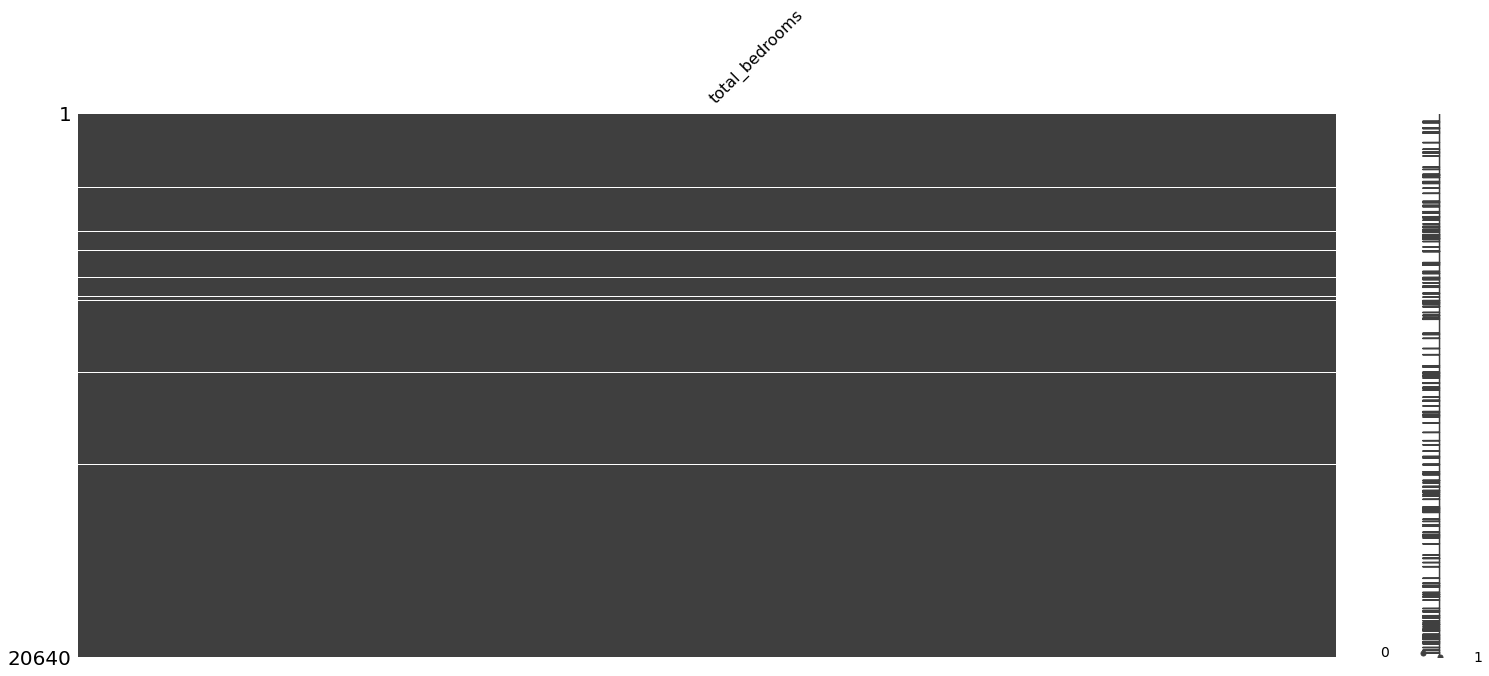

In [21]:
import missingno as msno
msno.matrix(df[nullable_columns])
plt.show()

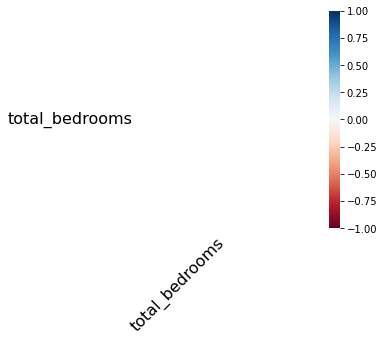

In [22]:
msno.heatmap(df[nullable_columns], figsize=(4,4))
plt.show()

In [23]:
df['total_bedrooms'].skew()

3.459546331523342

In [24]:
df['total_bedrooms'].fillna((df['total_bedrooms'].mean()), inplace=True)

In [25]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [26]:
# check for duplicated sum
df.duplicated().sum()

0

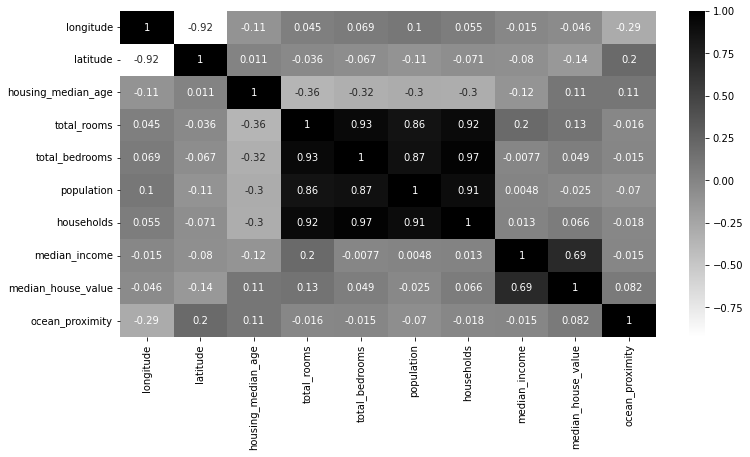

In [27]:
# check the correlation
import seaborn as sns
df.corr()

e = df.corr()
top_correlated_features = e.index
g = sns.heatmap(df[top_correlated_features].corr(), annot=True, cmap='gist_yarg')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

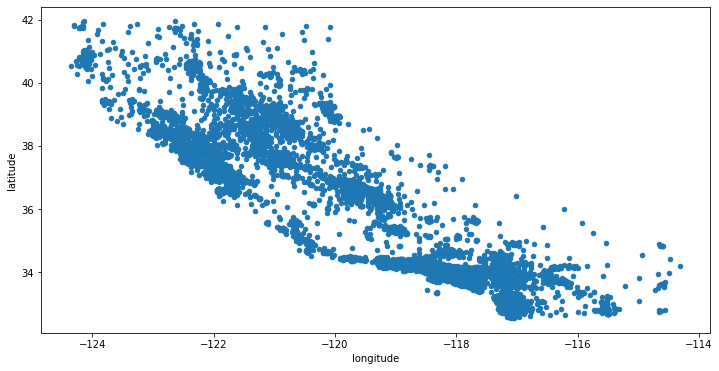

In [28]:
# Visualizing Geographical Data

df.plot(kind='scatter', x='longitude', y='latitude')

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

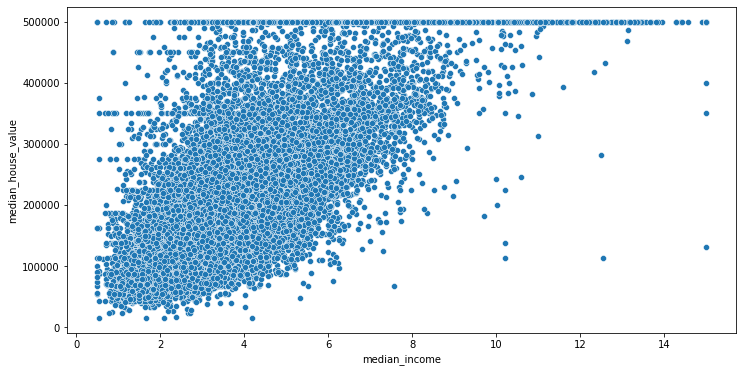

In [29]:
sns.scatterplot(
    x="median_income", y="median_house_value", data=df
)

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

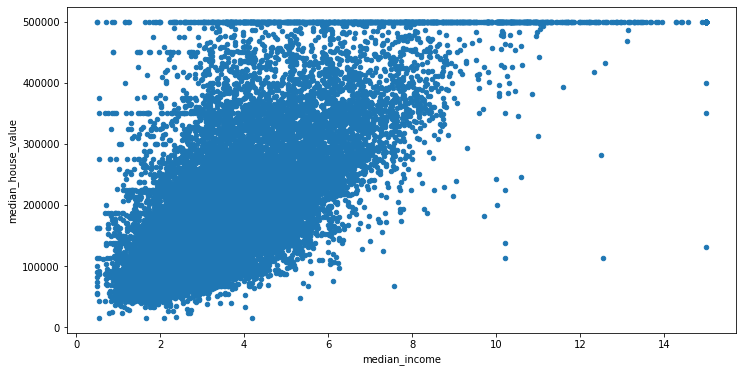

In [30]:
df.plot(
    kind="scatter", x="median_income", y="median_house_value"
)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.5 MB


In [32]:
df.sample(n=2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10005,-121.06,39.04,15.0,1999.0,287.0,585.0,246.0,5.5161,361900.0,1
14878,-117.07,32.64,38.0,1486.0,269.0,745.0,295.0,4.6477,150400.0,4


In [33]:
df_train = df[~df['median_house_value'].isna()]

In [34]:
df_test = df[df['median_house_value'].isna()]

In [35]:
X = df_train.drop('median_house_value', axis=1)

In [36]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3


In [37]:
y = df_train['median_house_value']

In [38]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [39]:
# split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2, random_state=42
)

In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [41]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = lin_reg.predict(X_test)

In [43]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.6142406531011801

        61% accurate model

In [44]:
# creating pipelines and scaling

from sklearn.pipeline  import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

In [45]:
num_pipeline.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [46]:
y_pred_rf = num_pipeline.predict(X_test)

In [47]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_rf)

0.6142406531011786

        still 61%

        2

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [50]:
y_pred = tree_reg.predict(X_test)

In [51]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.6461212157835232

        we get a 64.6% accurate model

In [264]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

param_grid = {
    'criterion' : ["squared_error", "absolute_error"],
    'splitter': ["best", 'random'], 
    'max_depth': [2,3,4,5]
}

gr_cv = GridSearchCV(
    tree_reg,
    param_grid=param_grid,
    cv=5
)

In [265]:
gr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [266]:
gr_cv.best_estimator_

DecisionTreeRegressor(max_depth=5)

In [274]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=5)

param_grid = {
    'criterion' : ["squared_error", "absolute_error"],
    'splitter': ["best", "random"],
    'max_depth' : [2,3,4,5]
}

gr_cv = RandomizedSearchCV(
    tree_reg,
    param_distributions=param_grid,
    cv=5
)

In [275]:
gr_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=5),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [2, 3, 4, 5],
                                        'splitter': ['best', 'random']})

In [276]:
y_pred = gr_cv.predict(X_test)

In [277]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.6139066667107536

        we get 61%

        4

In [278]:
from sklearn.ensemble import RandomForestRegressor

rgf = RandomForestRegressor()

In [279]:
rgf.fit(X_train, y_train)

RandomForestRegressor()

In [280]:
y_pred = gr_cv.predict(X_test)

In [281]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.6139066667107536

        61.39%

In [292]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

svr_rgf = SVR()
lin_regf = LinearRegression()
rgf_rf = RandomForestRegressor()

voting_rgf = VotingRegressor([
    ('svr', svr_rgf),
    ('lin',lin_regf),
    ('rgf', rgf_rf),
])

In [284]:
voting_rgf.fit(X_train, y_train)

VotingRegressor(estimators=[('svr', SVR()), ('lin', LinearRegression()),
                            ('rgf', RandomForestRegressor())])

In [288]:
from sklearn.metrics import r2_score

for clf in (svr_rgf, lin_regf, rgf_rf, voting_rgf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, r2_score(y_test, y_pred))

SVR -0.048657351953204975
LinearRegression 0.6142406531011801
RandomForestRegressor 0.8094944904290489
VotingRegressor 0.6536417221560014


        our VotingRegressor = 65.4%
        our RandomForestRegressor = 80.1%

        so we go with RandomForestRegressor

In [293]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

bag_rg = BaggingRegressor(
    RandomForestRegressor(),
    n_estimators=20, bootstrap_features=True, oob_score=True
)

In [294]:
bag_rg.fit(X_train, y_train)

BaggingRegressor(base_estimator=RandomForestRegressor(),
                 bootstrap_features=True, n_estimators=20, oob_score=True)

In [295]:
y_pred = bag_rg.predict(X_test)

In [296]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8137617712611277

        81.4%

In [52]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor

ada_rgs = AdaBoostRegressor(
    RandomForestRegressor(),
    n_estimators=50, learning_rate=0.5
)

In [53]:
ada_rgs.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(), learning_rate=0.5)

In [54]:
y_pred = ada_rgs.predict(X_test)

In [55]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8263490058090996

        we get 82.63%

--

In [57]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

gr_rg = GradientBoostingRegressor(
    learning_rate=0.5, n_estimators=500
)

In [58]:
gr_rg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, n_estimators=500)

In [59]:
y_pred = gr_rg.predict(X_test)

In [60]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8081966344428966

        80.81%